In [13]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *
from pyomo.environ import Constraint

# **Prediction**

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Load your DataFrame df
df_storage= pd.read_csv('/content/drive/MyDrive/Capstone Project MMAI/Final Dataset For Model/storage.csv')

In [17]:
df_storage

,Property Code,2022 Storage Comp price,2023 Storage Comp price,Total Units (2022Jul) (Storage),Occupied (2022Jul) (Storage),Percentage% (2022Jul) (Storage),New Lease (2022Jul) (Storage),Ending Lease (2022Jul) (Storage),Market Price (2022Jul) (Storage),Current Price (2022Jul) (Storage),...,Ending_Lease_Rate% (2023Apr) (Storage),Total Units (2023May) (Storage),Occupied (2023May) (Storage),Percentage% (2023May) (Storage),New Lease (2023May) (Storage),Ending Lease (2023May) (Storage),Market Price (2023May) (Storage),Current Price (2023May) (Storage),Lease_Turnover_Rate% (2023May) (Storage),Ending_Lease_Rate% (2023May) (Storage)
0,y31201,18.333333,20.000000,47.0,29.0,61.70,1.0,0.0,30.0,30.000000,...,63.83,47.0,27.0,57.45,0.0,27.0,30.0,30.000000,57.45,63.83
1,y31202,18.333333,20.000000,63.0,47.0,74.60,1.0,1.0,25.0,23.448276,...,39.68,63.0,47.0,74.60,0.0,18.0,25.0,23.500000,28.57,39.68
2,y31251,37.500000,50.000000,70.0,58.0,82.86,1.0,3.0,50.0,50.000000,...,71.43,70.0,52.0,74.29,0.0,25.0,50.0,50.000000,35.71,71.43
3,y31300,22.500000,20.000000,393.0,204.0,51.91,1.0,2.0,25.0,25.157895,...,6.36,393.0,206.0,52.42,3.0,194.0,25.0,25.144231,49.36,6.36
4,y31600,0.000000,27.500000,253.0,143.0,56.52,0.0,1.0,25.0,25.000000,...,9.88,253.0,140.0,55.34,1.0,121.0,25.0,25.000000,47.83,9.88
5,y31602,0.000000,36.666667,215.0,43.0,20.00,1.0,0.0,30.0,30.000000,...,13.95,215.0,90.0,41.86,3.0,130.0,30.0,30.000000,60.47,13.95
6,y40210,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
7,y40230,0.000000,50.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00
8,y40790,50.000000,0.000000,60.0,29.0,48.33,6.0,6.0,50.0,45.238095,...,83.33,60.0,24.0,40.00,2.0,47.0,50.0,45.312500,78.33,83.33
9,y40910,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.00


In [18]:
# Summary Statistics
summary_stats = df_storage.describe()
summary_stats

,2022 Storage Comp price,2023 Storage Comp price,Total Units (2022Jul) (Storage),Occupied (2022Jul) (Storage),Percentage% (2022Jul) (Storage),New Lease (2022Jul) (Storage),Ending Lease (2022Jul) (Storage),Market Price (2022Jul) (Storage),Current Price (2022Jul) (Storage),Lease_Turnover_Rate% (2022Jul) (Storage),...,Ending_Lease_Rate% (2023Apr) (Storage),Total Units (2023May) (Storage),Occupied (2023May) (Storage),Percentage% (2023May) (Storage),New Lease (2023May) (Storage),Ending Lease (2023May) (Storage),Market Price (2023May) (Storage),Current Price (2023May) (Storage),Lease_Turnover_Rate% (2023May) (Storage),Ending_Lease_Rate% (2023May) (Storage)
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,18.291667,14.247917,85.750000,42.925000,35.485250,1.875000,3.475000,18.87500,16.974988,2.669000,...,27.496000,85.650000,42.200000,34.380750,1.500000,49.250000,19.625000,18.202235,31.462000,27.511000
std,20.917309,19.175643,106.371326,57.706324,35.459393,3.817554,7.260669,17.19002,15.794048,4.475682,...,40.911821,106.367662,53.935004,33.394091,3.768969,68.572159,17.880927,17.335650,30.708193,40.908499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,0.000000,47.500000,26.500000,33.580000,0.000000,0.500000,25.00000,18.455936,0.170000,...,11.470000,47.500000,23.500000,40.410000,0.000000,16.000000,25.000000,19.418307,33.555000,11.470000
75%,35.000000,27.500000,174.500000,51.250000,62.942500,2.250000,4.500000,30.00000,30.000000,3.870000,...,39.215000,174.500000,55.500000,58.472500,2.000000,81.500000,31.250000,30.000000,55.740000,39.215000
max,60.000000,63.750000,393.000000,214.000000,100.000000,21.000000,42.000000,50.00000,50.000000,18.670000,...,166.670000,393.000000,206.000000,100.000000,23.000000,284.000000,50.000000,60.196078,96.930000,166.670000


In [19]:
# Correlation Matrix
correlation_matrix = df_storage.corr()
correlation_matrix

<ipython-input-19-bb1db7af98ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_storage.corr()


,2022 Storage Comp price,2023 Storage Comp price,Total Units (2022Jul) (Storage),Occupied (2022Jul) (Storage),Percentage% (2022Jul) (Storage),New Lease (2022Jul) (Storage),Ending Lease (2022Jul) (Storage),Market Price (2022Jul) (Storage),Current Price (2022Jul) (Storage),Lease_Turnover_Rate% (2022Jul) (Storage),...,Ending_Lease_Rate% (2023Apr) (Storage),Total Units (2023May) (Storage),Occupied (2023May) (Storage),Percentage% (2023May) (Storage),New Lease (2023May) (Storage),Ending Lease (2023May) (Storage),Market Price (2023May) (Storage),Current Price (2023May) (Storage),Lease_Turnover_Rate% (2023May) (Storage),Ending_Lease_Rate% (2023May) (Storage)
2022 Storage Comp price,1.000000,0.112559,0.142087,0.329717,0.648535,0.305249,0.200480,0.640472,0.556673,0.397546,...,0.575949,0.139132,0.250507,0.585868,0.139041,0.076206,0.640661,0.506806,0.387342,0.576826
2023 Storage Comp price,0.112559,1.000000,0.280360,0.237867,0.369054,0.164943,0.115218,0.392138,0.449902,0.149438,...,0.254942,0.281631,0.329350,0.471056,0.133591,0.198127,0.469159,0.462559,0.210060,0.254428
Total Units (2022Jul) (Storage),0.142087,0.280360,1.000000,0.807454,0.339793,0.451141,0.450844,0.498352,0.478334,0.255673,...,-0.093248,0.999631,0.866290,0.371005,0.410284,0.934247,0.540806,0.484156,0.700467,-0.092712
Occupied (2022Jul) (Storage),0.329717,0.237867,0.807454,1.000000,0.600384,0.538739,0.557537,0.478498,0.399269,0.380584,...,0.004959,0.799577,0.964174,0.569595,0.526099,0.575797,0.507155,0.386292,0.454111,0.006364
Percentage% (2022Jul) (Storage),0.648535,0.369054,0.339793,0.600384,1.000000,0.364186,0.346875,0.818475,0.742919,0.502023,...,0.712605,0.333788,0.551563,0.975539,0.321825,0.157941,0.798296,0.693093,0.464343,0.713503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ending Lease (2023May) (Storage),0.076206,0.198127,0.934247,0.575797,0.157941,0.334718,0.318955,0.458898,0.441372,0.162581,...,-0.122852,0.935200,0.634883,0.187271,0.235331,1.000000,0.499773,0.460489,0.768204,-0.122500
Market Price (2023May) (Storage),0.640661,0.469159,0.540806,0.507155,0.798296,0.397463,0.297658,0.974604,0.935667,0.428604,...,0.685680,0.539591,0.514412,0.797344,0.231137,0.499773,1.000000,0.889190,0.751635,0.686228
Current Price (2023May) (Storage),0.506806,0.462559,0.484156,0.386292,0.693093,0.295132,0.294929,0.907401,0.954331,0.465657,...,0.635628,0.486759,0.436574,0.720083,0.175693,0.460489,0.889190,1.000000,0.746665,0.635624
Lease_Turnover_Rate% (2023May) (Storage),0.387342,0.210060,0.700467,0.454111,0.464343,0.335894,0.324620,0.740883,0.737461,0.412977,...,0.277386,0.700323,0.485308,0.469385,0.180037,0.768204,0.751635,0.746665,1.000000,0.277659


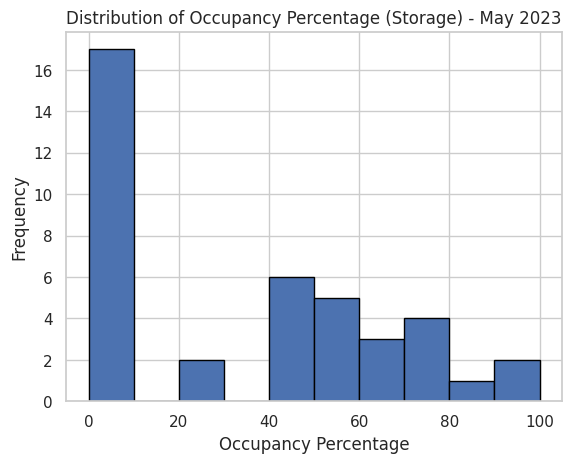

In [20]:
# Histogram for Outdoor Parking Percentage in May 2023
plt.hist(df_storage['Percentage% (2023May) (Storage)'], bins=10, edgecolor='black')
plt.title('Distribution of Occupancy Percentage (Storage) - May 2023')
plt.xlabel('Occupancy Percentage')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Define the month names
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define the function to get the most recent month and year from the dataset
def get_recent_month_year(df_storage):
    all_months = sorted([col.split(' ')[1][1:-1] for col in df_storage.columns if "Percentage%" in col])
    recent_month = all_months[-1]
    recent_year = int(recent_month[:4])
    recent_month_name = recent_month[4:]
    recent_month_num = month_names.index(recent_month_name) + 1
    return recent_month_num, recent_year

In [22]:
# Get the recent month and year
recent_month, recent_year = get_recent_month_year(df_storage)
recent_month_str = f'{recent_year}{month_names[recent_month - 1]}'
target_month = (recent_month % 12) + 1
target_year = recent_year if recent_month != 12 else recent_year + 1

# Select relevant columns for the regression model
feature_columns = [col for col in df_storage.columns if col not in ['Property Code', f'Percentage% ({recent_month_str}) (Storage)']]
target_column = f'Percentage% ({recent_month_str}) (Storage)'

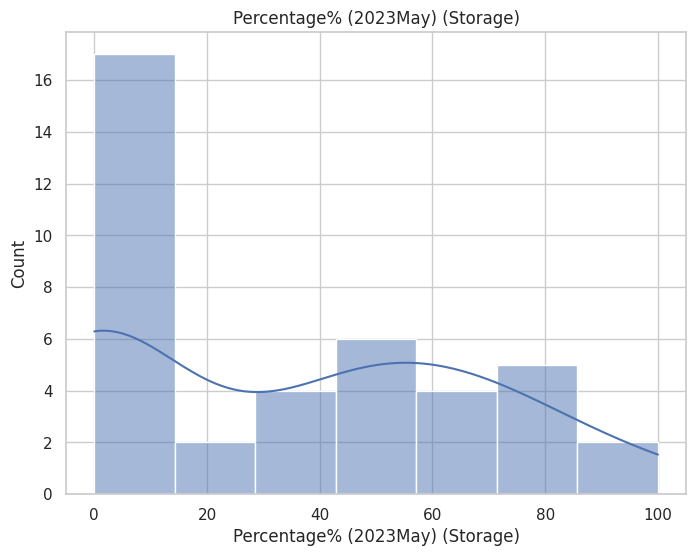

In [23]:
# Set the style of seaborn for our plots
sns.set(style="whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df_storage[target_column], kde=True)
plt.title(f'Percentage% ({recent_month_str}) (Storage)')
plt.show()

In [24]:
# Prepare the data
X_storage = df_storage[feature_columns]
y_storage = df_storage[target_column]

In [25]:
# Split the data into training and testing sets
X_train_storage, X_test_storage, y_train_storage, y_test_storage = train_test_split(X_storage, y_storage, test_size=0.2, random_state=42)

In [26]:
# Initialize and train the Random Forest model
rf_storage = RandomForestRegressor(random_state=42)
rf_storage.fit(X_train_storage, y_train_storage)

RandomForestRegressor(random_state=42)

In [27]:
# Get feature importances
importances_storage = rf_storage.feature_importances_
features_importances_storage = sorted(zip(importances_storage, X_storage.columns), reverse=True)


In [28]:
# Print feature importances
for importance, name in features_importances_storage:
    print(f"Feature: {name}, Importance: {importance}")

Feature: Percentage% (2023Apr) (Storage), Importance: 0.49484372911822233
Feature: Percentage% (2022Aug) (Storage), Importance: 0.09359491515412487
Feature: Percentage% (2022Dec) (Storage), Importance: 0.08878912806174506
Feature: Percentage% (2022Oct) (Storage), Importance: 0.08003326326903248
Feature: Percentage% (2022Sep) (Storage), Importance: 0.06094604143291434
Feature: Percentage% (2022Jul) (Storage), Importance: 0.04462056981478458
Feature: Occupied (2023May) (Storage), Importance: 0.019917196044817585
Feature: Lease_Turnover_Rate% (2022Dec) (Storage), Importance: 0.013026823944148004
Feature: Occupied (2022Aug) (Storage), Importance: 0.010128474340055382
Feature: Current Price (2023Apr) (Storage), Importance: 0.009492309821666493
Feature: Occupied (2022Dec) (Storage), Importance: 0.009177100880523544
Feature: Lease_Turnover_Rate% (2023Apr) (Storage), Importance: 0.008747455052421896
Feature: Market Price (2022Dec) (Storage), Importance: 0.008480140996493017
Feature: Lease_Turn

In [29]:
# Select the most important features
important_features_storage = [name for importance, name in features_importances_storage if importance > 0.01]

In [30]:
# Prepare the data with only the most important features
X_storage = df_storage[important_features_storage]

# Split the data into training and testing sets again
X_train_storage, X_test_storage, y_train_storage, y_test_storage = train_test_split(X_storage, y_storage, test_size=0.2, random_state=42)

In [31]:
# Initialize and train the Random Forest model again
rf_storage = RandomForestRegressor(random_state=42)
rf_storage.fit(X_train_storage, y_train_storage)

RandomForestRegressor(random_state=42)

In [32]:
# Predict the target variable for the test data
y_pred_storage = rf_storage.predict(X_test_storage)

In [33]:
# Calculate and print the Root Mean Squared Error (RMSE)
rmse_storage = np.sqrt(mean_squared_error(y_test_storage, y_pred_storage))
print('RMSE for Storage:', rmse_storage)


RMSE for Storage: 3.6470538935557295


<ipython-input-34-3f700ea11fb5>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_storage.min(), y_test_storage.max()], [y_test_storage.min(), y_test_storage.max()], 'k--', lw=4, color='red')


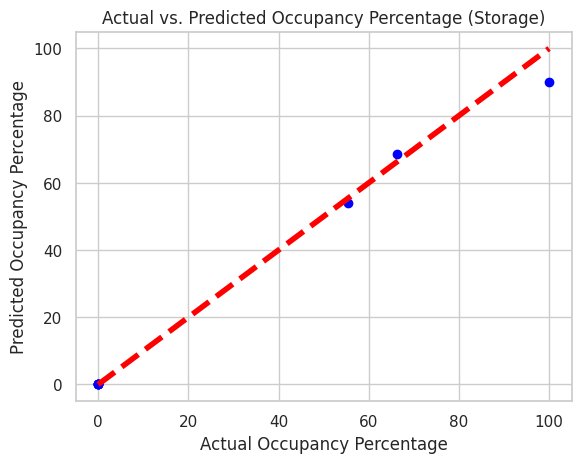

In [34]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test_storage, y_pred_storage, color='blue')
plt.plot([y_test_storage.min(), y_test_storage.max()], [y_test_storage.min(), y_test_storage.max()], 'k--', lw=4, color='red')
plt.xlabel('Actual Occupancy Percentage')
plt.ylabel('Predicted Occupancy Percentage')
plt.title('Actual vs. Predicted Occupancy Percentage (Storage)')
plt.show()

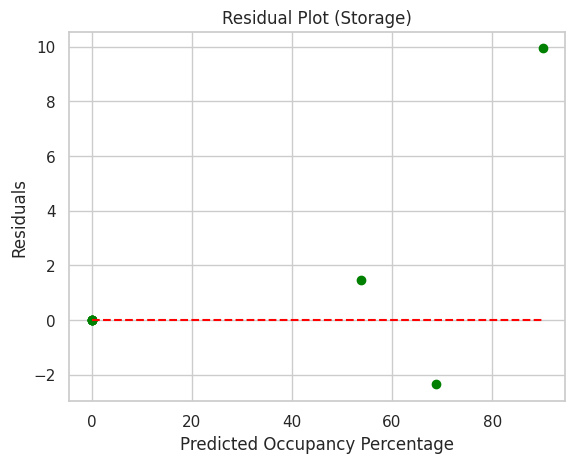

In [35]:
# Residual plot
residuals_storage = y_test_storage - y_pred_storage
plt.scatter(y_pred_storage, residuals_storage, color='green')
plt.hlines(y=0, xmin=y_pred_storage.min(), xmax=y_pred_storage.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Occupancy Percentage')
plt.ylabel('Residuals')
plt.title('Residual Plot (Storage)')
plt.show()

# **Optimization**

In [36]:
# Create a new concrete model for storage optimization
model_storage = ConcreteModel()

# Define the decision variables
model_storage.price = Var(df_storage.index, domain=NonNegativeReals)

In [37]:
# Define the objective function
def objective_rule_storage(model):
    return sum(y_storage[i] * model_storage.price[i] for i in df_storage.index)
model_storage.objective = Objective(rule=objective_rule_storage, sense=maximize)

In [38]:
# Remove the existing constraints from the model
if hasattr(model_storage, 'price_lower_limit_constraint'):
    model_storage.del_component(model_storage.price_lower_limit_constraint)
if hasattr(model_storage, 'price_upper_limit_constraint'):
    model_storage.del_component(model_storage.price_upper_limit_constraint)

# Define the lower limit constraint for each property's price (must be >= market price)
def price_lower_limit_constraint_rule_storage(model, i):
    return model_storage.price[i] >= df_storage.loc[i, f'Market Price ({recent_month_str}) (Storage)']
model_storage.price_lower_limit_constraint = Constraint(df_storage.index, rule=price_lower_limit_constraint_rule_storage)

# Define the upper limit constraint for each property's price (must be <= 1.1 times market price)
price_upper_limit_storage = 1.1
def price_upper_limit_constraint_rule_storage(model, i):
     return model_storage.price[i] <= price_upper_limit_storage * df_storage.loc[i, f'Market Price ({recent_month_str}) (Storage)']
model_storage.price_upper_limit_constraint = Constraint(df_storage.index, rule=price_upper_limit_constraint_rule_storage)

In [39]:
# Solve the model
solver = SolverFactory('glpk')
solver.solve(model_storage)

{'Problem': [{'Name': 'unknown', 'Lower bound': 50112.81, 'Upper bound': 50112.81, 'Number of objectives': 1, 'Number of constraints': 80, 'Number of variables': 40, 'Number of nonzeros': 80, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.03872990608215332}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [40]:
# After solving the model
optimal_prices_storage = [model_storage.price[i].value for i in df_storage.index]
max_revenue_storage = model_storage.objective()

print("Optimal prices (Storage): ", optimal_prices_storage)
print("Maximum revenue (Storage): ", max_revenue_storage)

Optimal prices (Storage):  [33.0, 27.5, 55.0, 27.5, 27.5, 33.0, 0.0, 0.0, 55.0, 0.0, 0.0, 38.5, 38.5, 27.5, 22.0, 0.0, 0.0, 55.0, 44.0, 0.0, 0.0, 0.0, 27.5, 0.0, 33.0, 27.5, 0.0, 0.0, 0.0, 44.0, 22.0, 0.0, 0.0, 33.0, 55.0, 0.0, 38.5, 27.5, 27.5, 44.0]
Maximum revenue (Storage):  50112.810000000005
